# Airlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
data.drop_duplicates()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [8]:
data.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


{'whiskers': [<matplotlib.lines.Line2D at 0x201e2c4b190>,
 'caps': [<matplotlib.lines.Line2D at 0x201e2c4b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x201e2c34fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x201e2c4bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x201e2c4bfa0>],
 'means': []}

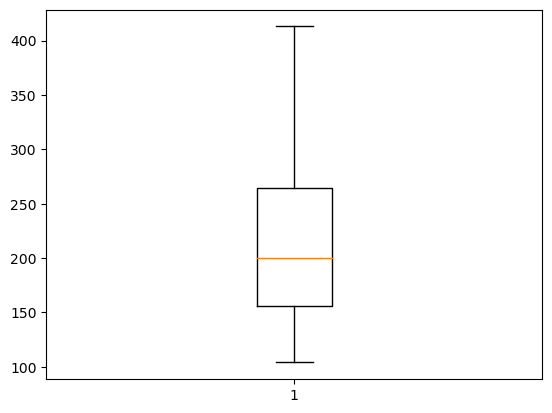

In [9]:
plt.boxplot(data.Passengers)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., 17., 39., 40.],
        [96.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([104.0, 1295.8, 2487.6, 3679.3999999999996, 4871.2, 6063.0,
        7254.799999999999, 8446.6, 9638.4, 10830.199999999999, 12022.0],
       dtype=object),
 <a list of 2 BarContainer objects>)

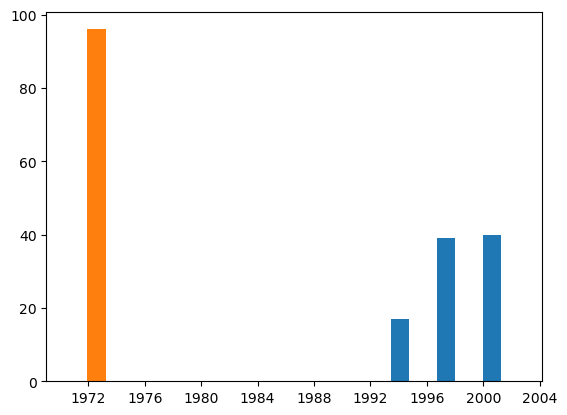

In [10]:
plt.hist(data)

<AxesSubplot:>

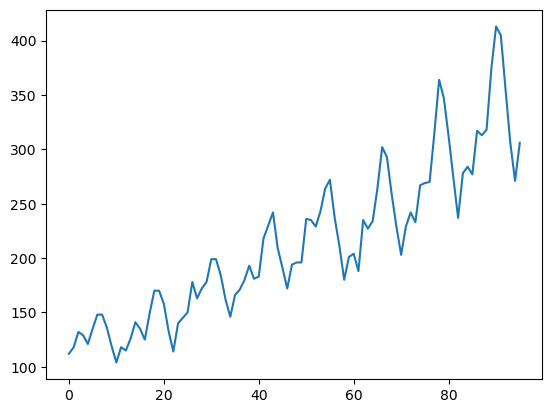

In [11]:
data.Passengers.plot()

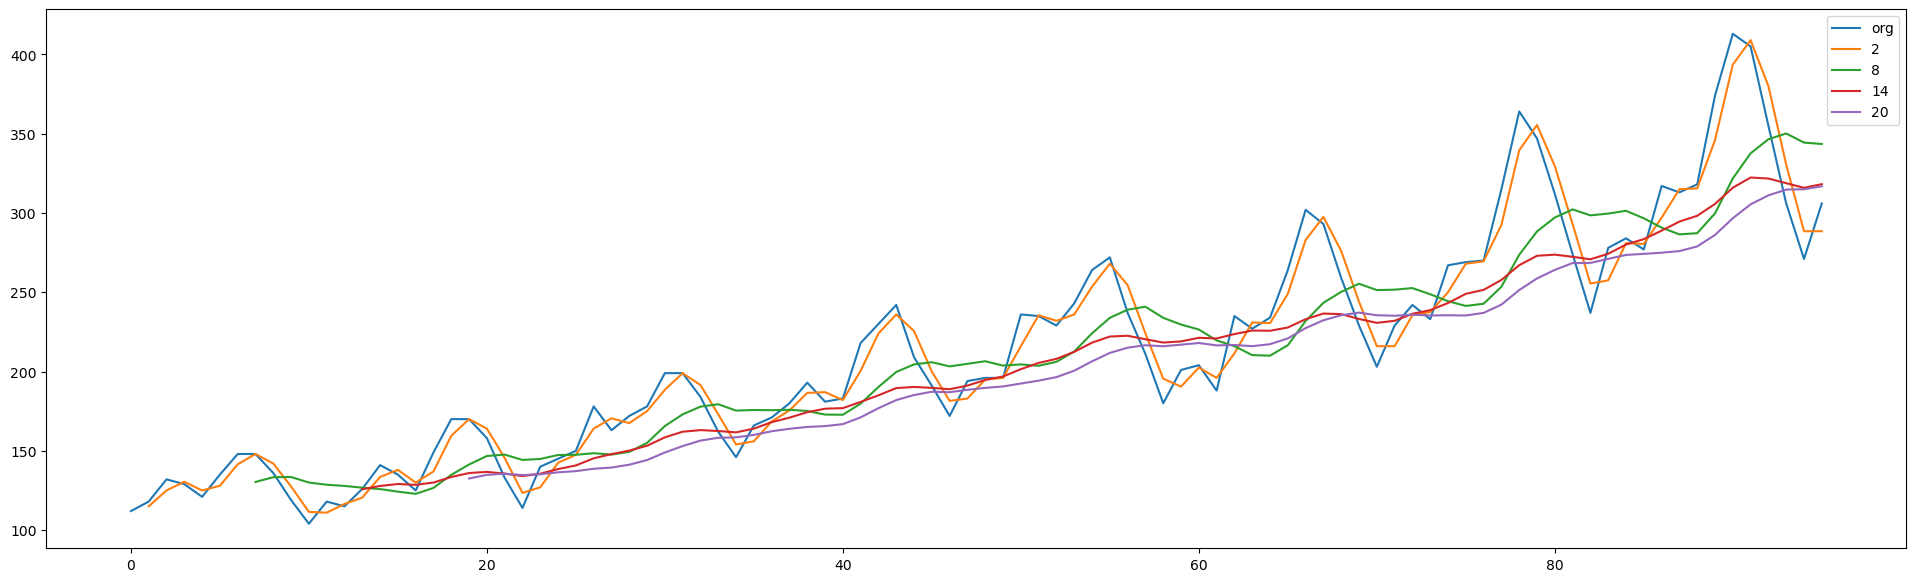

In [12]:
plt.figure(figsize=(24,7))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

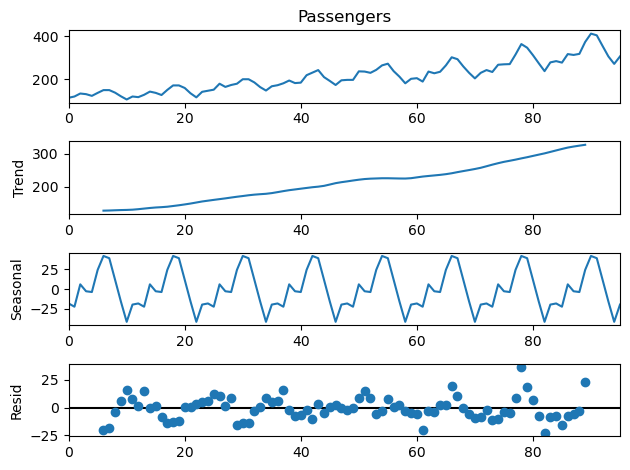

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

C:\Users\nagal\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


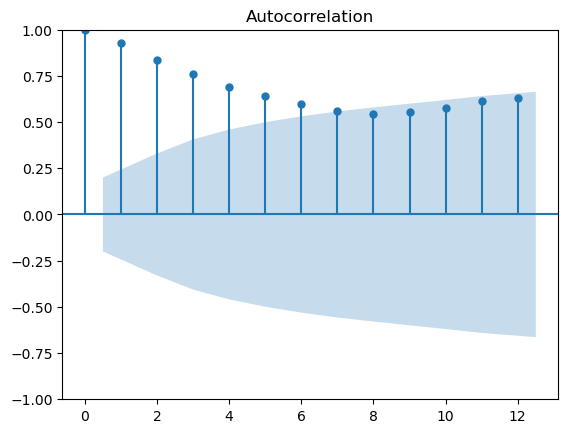

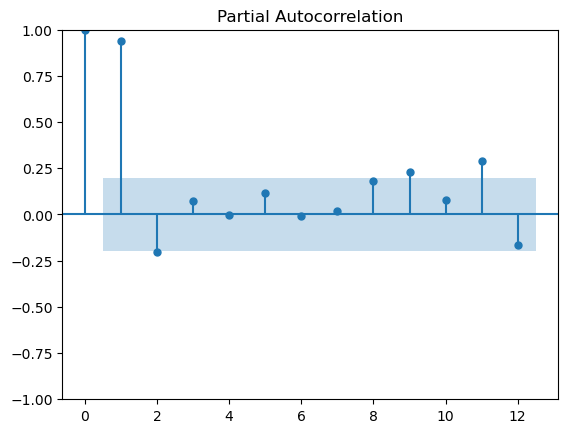

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [15]:
data.shape

(96, 2)

In [16]:
data['t'] = np.arange(1,97)
data['t_squared'] = data['t']**2
data["log_passengers"] =np.log(data['Passengers'])

In [17]:
data

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [18]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") 
data["year"] = data.Date.dt.strftime("%Y") 

In [19]:
data

,Month,Passengers,t,t_squared,log_passengers,Date,month,year
0,1995-01-01,112,1,1,4.718499,1995-01-01,Jan,1995
1,1995-02-01,118,2,4,4.770685,1995-02-01,Feb,1995
2,1995-03-01,132,3,9,4.882802,1995-03-01,Mar,1995
3,1995-04-01,129,4,16,4.859812,1995-04-01,Apr,1995
4,1995-05-01,121,5,25,4.795791,1995-05-01,May,1995
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,2002-08-01,Aug,2002
92,2002-09-01,355,93,8649,5.872118,2002-09-01,Sep,2002
93,2002-10-01,306,94,8836,5.723585,2002-10-01,Oct,2002
94,2002-11-01,271,95,9025,5.602119,2002-11-01,Nov,2002


In [20]:
df=pd.get_dummies(data.month)
df

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
data=pd.concat([data,df],axis= 1)

In [22]:
data

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,1,4.718499,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,5.723585,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,5.602119,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
Train=data.head(84)
Test=data.tail(12)

In [24]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480264

In [25]:
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315608

In [26]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979331586

In [27]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [28]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.36081761208177

In [29]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708652

In [30]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544324777

In [31]:
df = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [32]:
data

,Month,Passengers,t,t_squared,log_passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,1,4.718499,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,5.723585,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,5.602119,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
final_model=Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = data).fit()

In [52]:
final_model.predict(data)

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [54]:
new_data=pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [56]:
data_pred=pd.DataFrame(new_data,columns=['month'])

In [57]:
data_pred

,month
0,Jan
1,Feb
2,Mar
3,Apr
4,May
5,Jun
6,Jul
7,Aug
8,Sep
9,Oct


In [65]:
year=pd.Series([2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003])

In [66]:
df=pd.DataFrame(year,columns=['year'])

In [67]:
df

,year
0,2003
1,2003
2,2003
3,2003
4,2003
5,2003
6,2003
7,2003
8,2003
9,2003


In [68]:
final_data=pd.concat([data_pred,df],axis= 1)

In [69]:
final_data

,month,year
0,Jan,2003
1,Feb,2003
2,Mar,2003
3,Apr,2003
4,May,2003
5,Jun,2003
6,Jul,2003
7,Aug,2003
8,Sep,2003
9,Oct,2003


In [74]:
final_data['t'] = np.arange(1,13)
final_data['t_squared'] = final_data['t']**2

In [75]:
final_data

,month,year,t,t_squared
0,Jan,2003,1,1
1,Feb,2003,2,4
2,Mar,2003,3,9
3,Apr,2003,4,16
4,May,2003,5,25
5,Jun,2003,6,36
6,Jul,2003,7,49
7,Aug,2003,8,64
8,Sep,2003,9,81
9,Oct,2003,10,100


In [78]:
final_data=pd.get_dummies(final_data)
final_data

,year,t,t_squared,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2003,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2003,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,2003,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,2003,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,2003,5,25,0,0,0,0,0,0,0,0,1,0,0,0
5,2003,6,36,0,0,0,0,0,0,1,0,0,0,0,0
6,2003,7,49,0,0,0,0,0,1,0,0,0,0,0,0
7,2003,8,64,0,1,0,0,0,0,0,0,0,0,0,0
8,2003,9,81,0,0,0,0,0,0,0,0,0,0,0,1
9,2003,10,100,0,0,0,0,0,0,0,0,0,0,1,0


In [82]:
finaldata=final_data.rename({'month_Apr':'Apr','month_Aug':'Aug','month_Dec':'Dec','month_Feb':'Feb','month_Jan':'Jan','month_Jul':'Jul',
                   'month_Jun':'Jun','month_Mar':'Mar','month_May':'May','month_Nov':'Nov','month_Oct':'Oct','month_Sept':'Sept'},axis=1)

In [83]:
finaldata

,year,t,t_squared,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,month_Sep
0,2003,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2003,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,2003,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,2003,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,2003,5,25,0,0,0,0,0,0,0,0,1,0,0,0
5,2003,6,36,0,0,0,0,0,0,1,0,0,0,0,0
6,2003,7,49,0,0,0,0,0,1,0,0,0,0,0,0
7,2003,8,64,0,1,0,0,0,0,0,0,0,0,0,0
8,2003,9,81,0,0,0,0,0,0,0,0,0,0,0,1
9,2003,10,100,0,0,0,0,0,0,0,0,0,0,1,0


In [85]:
finaldata=finaldata.rename({'month_Sep':'Sep'},axis=1)

In [86]:
finaldata

,year,t,t_squared,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2003,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,2003,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,2003,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,2003,5,25,0,0,0,0,0,0,0,0,1,0,0,0
5,2003,6,36,0,0,0,0,0,0,1,0,0,0,0,0
6,2003,7,49,0,0,0,0,0,1,0,0,0,0,0,0
7,2003,8,64,0,1,0,0,0,0,0,0,0,0,0,0
8,2003,9,81,0,0,0,0,0,0,0,0,0,0,0,1
9,2003,10,100,0,0,0,0,0,0,0,0,0,0,1,0


In [87]:
final_model.predict(finaldata)

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
5     4.931133
6     5.037387
7     5.035271
8     4.925032
9     4.794920
10    4.664470
11    4.801017
dtype: float64

# CocaCola

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data=pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

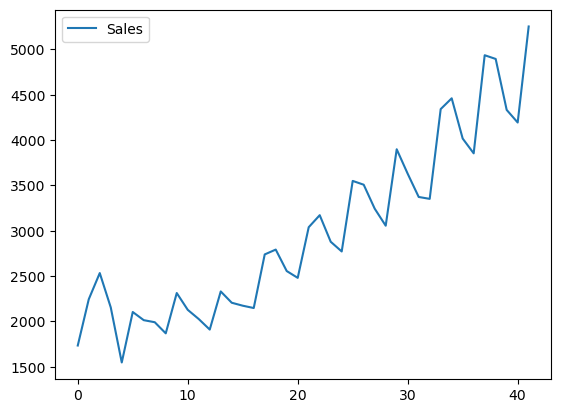

In [90]:
data.plot()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

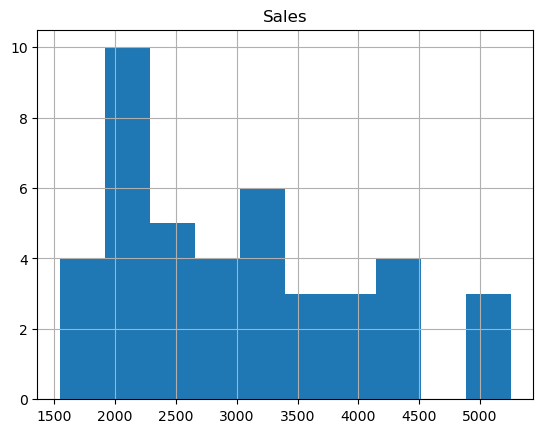

In [91]:
data.hist()

<AxesSubplot:ylabel='Density'>

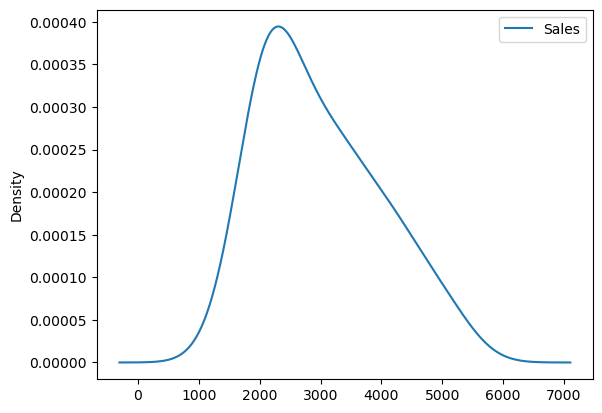

In [94]:
import seaborn as sns
data.plot(kind='kde')

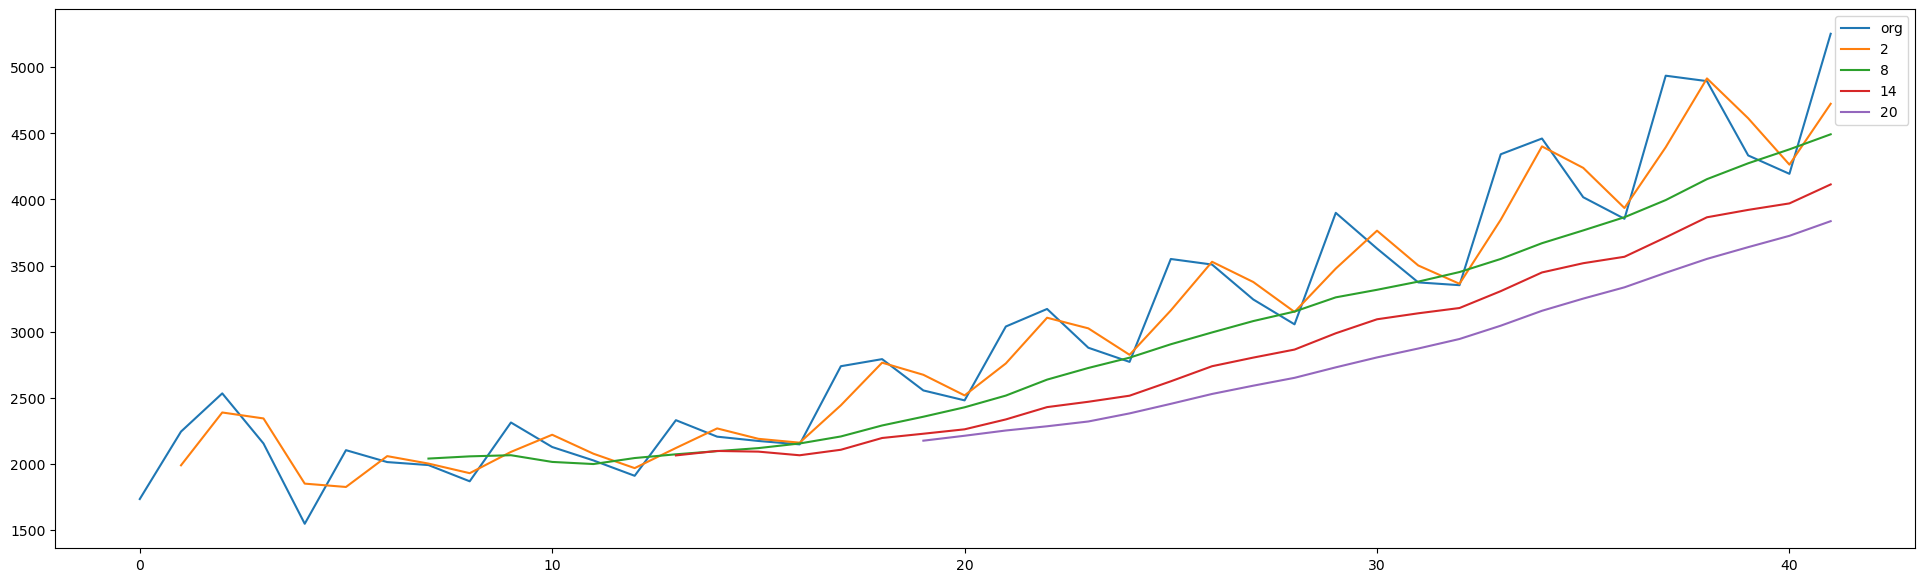

In [98]:
plt.figure(figsize=(24,7))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

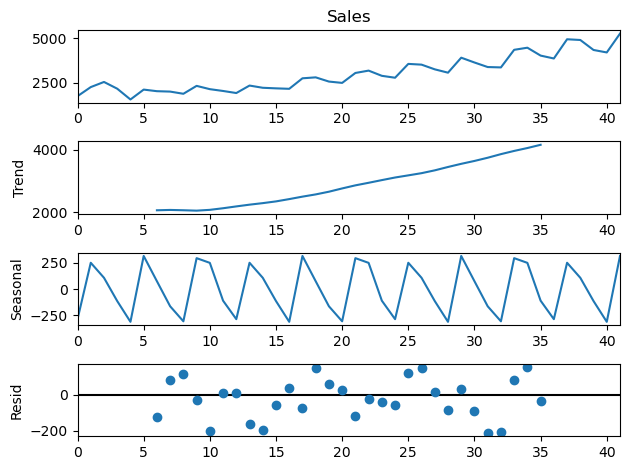

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

C:\Users\nagal\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


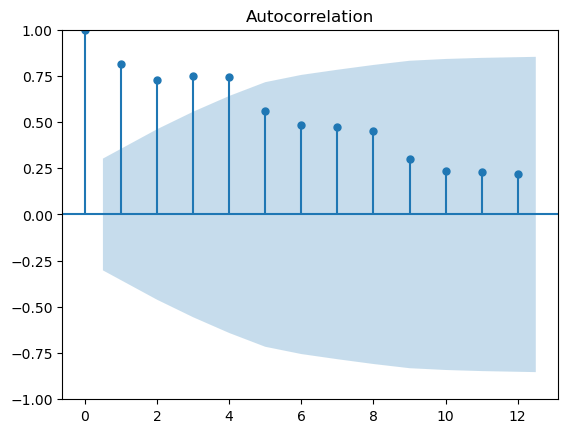

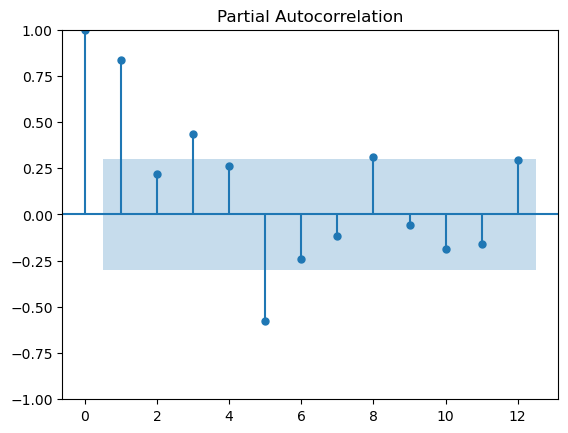

In [100]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [101]:
data.shape

(42, 2)

In [104]:
data['quarter'] = 0
for i in range(42):
    p=data['Quarter'][i]
    data['quarter'][i]=p[0:2]

C:\Users\nagal\AppData\Local\Temp\ipykernel_10064\2144072225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=p[0:2]


In [105]:
data

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [108]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [111]:
data_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
data1=pd.concat([data,data_dummies],axis= 1)

In [112]:
data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [113]:
data1['t'] = np.arange(1,43)
data1['t_squared'] = data1['t']**2
data1["Sales_log"] =np.log(data1['Sales'])

In [114]:
data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [115]:
Train=data1.head(32)
Test=data1.tail(10)

In [116]:
import statsmodels.formula.api as smf

In [117]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

In [123]:
Exp = smf.ols('Sales_log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076458

In [124]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554073874

In [125]:
df = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393


In [128]:
final_model=smf.ols('Sales~t+t_squared',data=data1).fit()

In [129]:
final_model.predict(data1)

0     1965.086473
1     1969.154619
2     1976.683265
3     1987.672410
4     2002.122054
5     2020.032198
6     2041.402841
7     2066.233983
8     2094.525625
9     2126.277767
10    2161.490408
11    2200.163548
12    2242.297188
13    2287.891327
14    2336.945965
15    2389.461103
16    2445.436740
17    2504.872877
18    2567.769513
19    2634.126649
20    2703.944284
21    2777.222418
22    2853.961052
23    2934.160185
24    3017.819818
25    3104.939950
26    3195.520581
27    3289.561712
28    3387.063342
29    3488.025472
30    3592.448101
31    3700.331229
32    3811.674857
33    3926.478984
34    4044.743611
35    4166.468737
36    4291.654363
37    4420.300488
38    4552.407112
39    4687.974236
40    4827.001859
41    4969.489982
dtype: float64

In [130]:
data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [131]:
new_data=pd.Series(['Q1','Q2','Q3','Q4'])

In [132]:
data_pred=pd.DataFrame(new_data,columns=['quarter'])

In [133]:
data_pred

,quarter
0,Q1
1,Q2
2,Q3
3,Q4


In [138]:
df=pd.get_dummies(data_pred)
df

,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [140]:
data1=pd.concat([data_pred,df],axis= 1)
data1

,quarter,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,Q1,1,0,0,0
1,Q2,0,1,0,0
2,Q3,0,0,1,0
3,Q4,0,0,0,1


In [143]:
data1['t'] = np.arange(1,5)
data1['t_squared'] = data1['t']**2

In [144]:
data1

,quarter,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,t,t_squared
0,Q1,1,0,0,0,1,1
1,Q2,0,1,0,0,2,4
2,Q3,0,0,1,0,3,9
3,Q4,0,0,0,1,4,16


In [145]:
finaldata=data1

In [146]:
finaldata

,quarter,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,t,t_squared
0,Q1,1,0,0,0,1,1
1,Q2,0,1,0,0,2,4
2,Q3,0,0,1,0,3,9
3,Q4,0,0,0,1,4,16


In [147]:
final_model.predict(finaldata)

0    1965.086473
1    1969.154619
2    1976.683265
3    1987.672410
dtype: float64